# UMAPs Neurips samples, NK cells

In this notebook known NK cell markers are plotted in scatterplots to see if there are any correlation between their expression. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Neurips
adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [3]:
#To find gene names

result = [i for i in adata_neurips.var_names if i.startswith('TC')]
print(result)

['TC2N', 'TCAF1', 'TCAF2', 'TCAIM', 'TCAP', 'TCEA1', 'TCEA2', 'TCEA3', 'TCEAL1', 'TCEAL2', 'TCEAL3', 'TCEAL4', 'TCEAL5', 'TCEAL7', 'TCEAL8', 'TCEAL9', 'TCEANC', 'TCEANC2', 'TCEB1', 'TCEB2', 'TCEB3', 'TCEB3-AS1', 'TCERG1', 'TCF12', 'TCF15', 'TCF19', 'TCF20', 'TCF23', 'TCF25', 'TCF3', 'TCF4', 'TCF4-AS2', 'TCF7', 'TCF7L1', 'TCF7L2', 'TCFL5', 'TCHH', 'TCHP', 'TCIRG1', 'TCL1A', 'TCL1B', 'TCL6', 'TCN2', 'TCOF1', 'TCP1', 'TCP10L', 'TCP11', 'TCP11L1', 'TCP11L2', 'TCTA', 'TCTE1', 'TCTE3', 'TCTEX1D1', 'TCTEX1D2', 'TCTEX1D4', 'TCTN1', 'TCTN2', 'TCTN3']


In [4]:
#Both NK cell types selected

neurips_nk = adata_neurips[(adata_neurips.obs['cell_type'] == "NK") | (adata_neurips.obs['cell_type'] == "NK CD158e1+")]

In [5]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [6]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [7]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

In [8]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [9]:
#selecting one sample from Neurips

eg=adata_neurips[adata_neurips.obs['POOL'] == "s1d2"]


In [10]:
eg

View of AnnData object with n_obs × n_vars = 4450 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [11]:
prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [12]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CX3CR1': 'CX3CR1_prot', 'CD226':'CD226_prot', 'TIGIT':'TIGIT_prot', 'CD27':'CD27_prot', 'CD38': 'CD38_prot', 'CD224': 'CD224_prot', 'CD7': 'CD7_prot', 'CD44': 'CD44_prot', 'CD34': 'CD34_prot','CD5': 'CD5_prot'})


In [13]:
#adding protein information to obs

a = neurips_nk.obs
b = prot

adata_eg=pd.concat([a, b], axis=1)
neurips_nk.obs=adata_eg


In [14]:
neurips_nk


AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7_prot', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44_prot', 'CD14', 'CD16', 'CD25',

In [15]:
#Computing a neighborhood of observations using latent space

sc.pp.neighbors(neurips_nk, use_rep="X_totalVI")   #indicated representation

sc.tl.umap(neurips_nk)

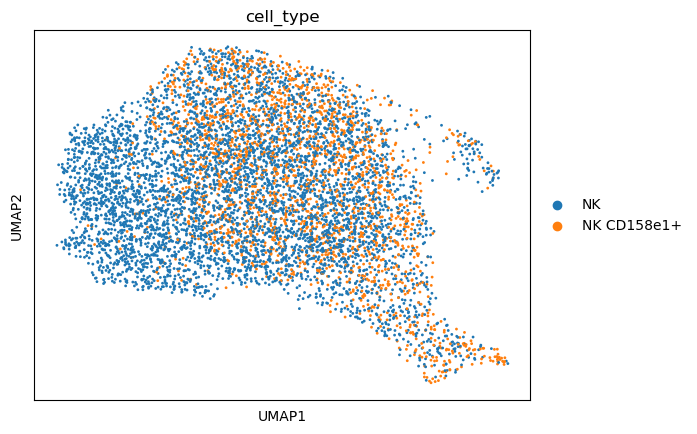

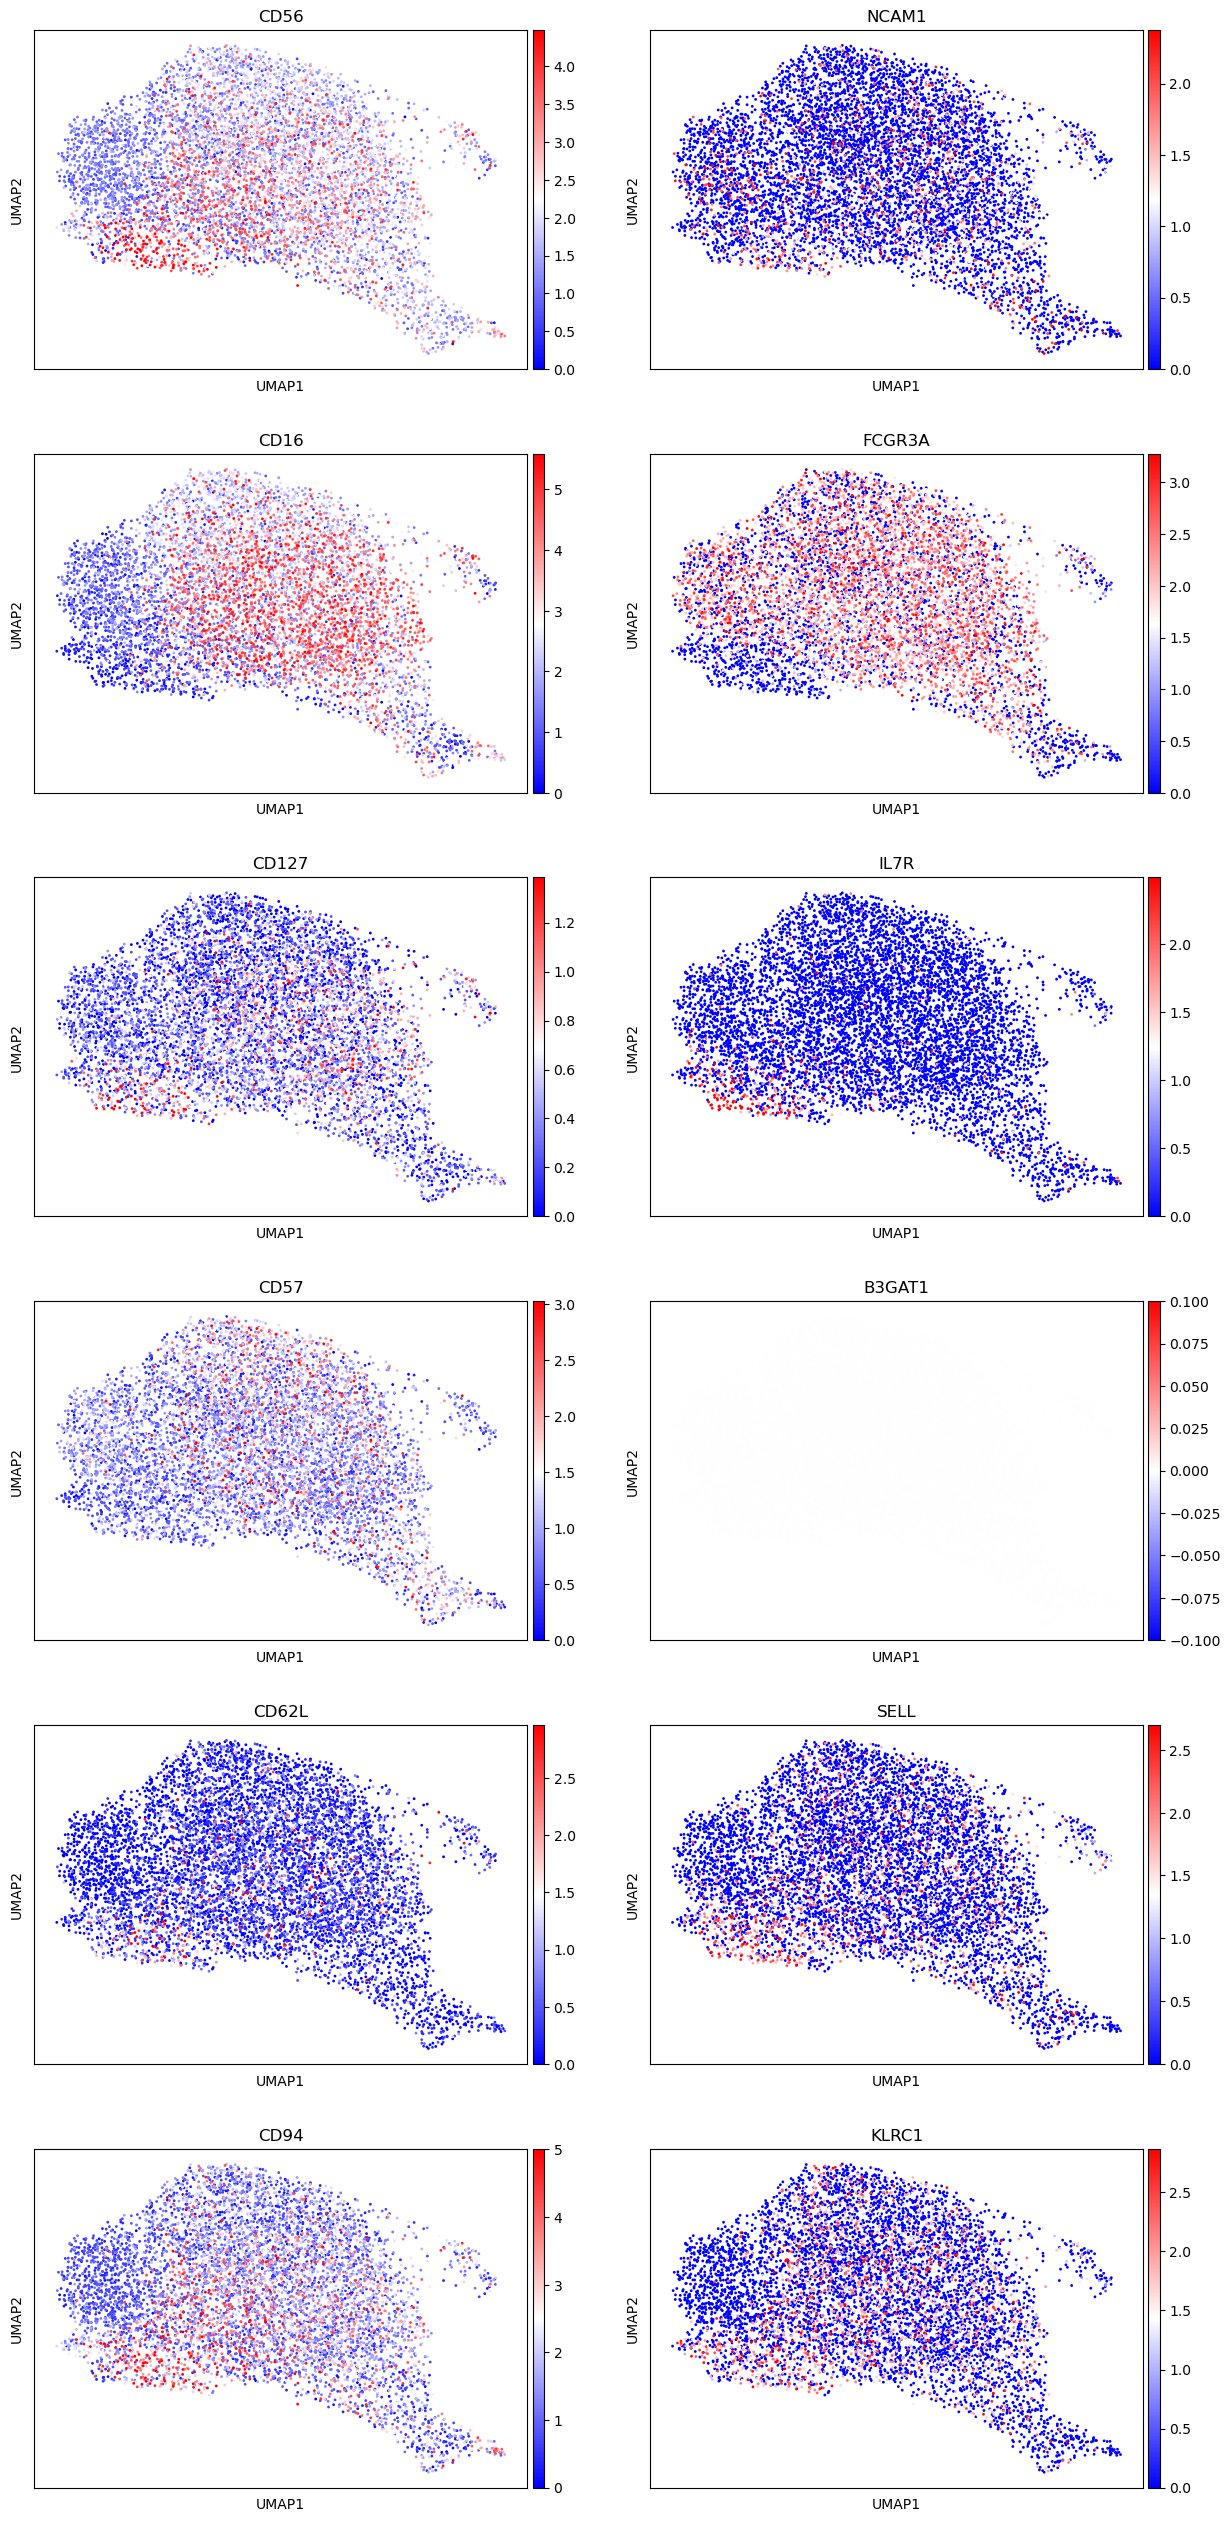

In [16]:
markers= ['CD56', 'NCAM1', 'CD16','FCGR3A', 'CD127', 'IL7R', 'CD57', 'B3GAT1', 'CD62L','SELL', 'CD94', 'KLRC1']

sc.pl.umap(neurips_nk, color = ['cell_type'], color_map = 'viridis')

#RNA
sc.pl.umap(neurips_nk, color = markers, vmax="p99", color_map = 'bwr', ncols=2)

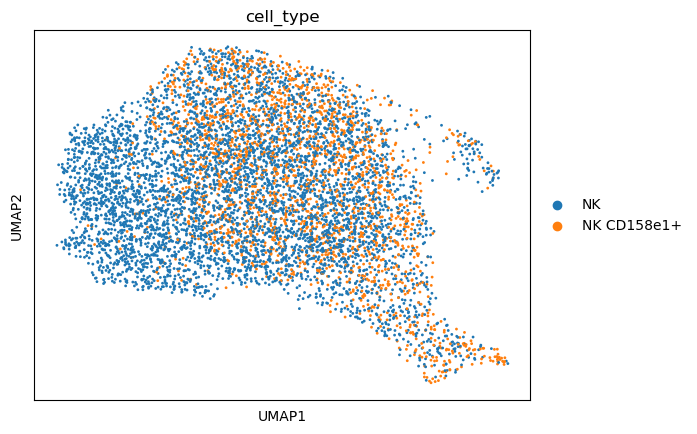

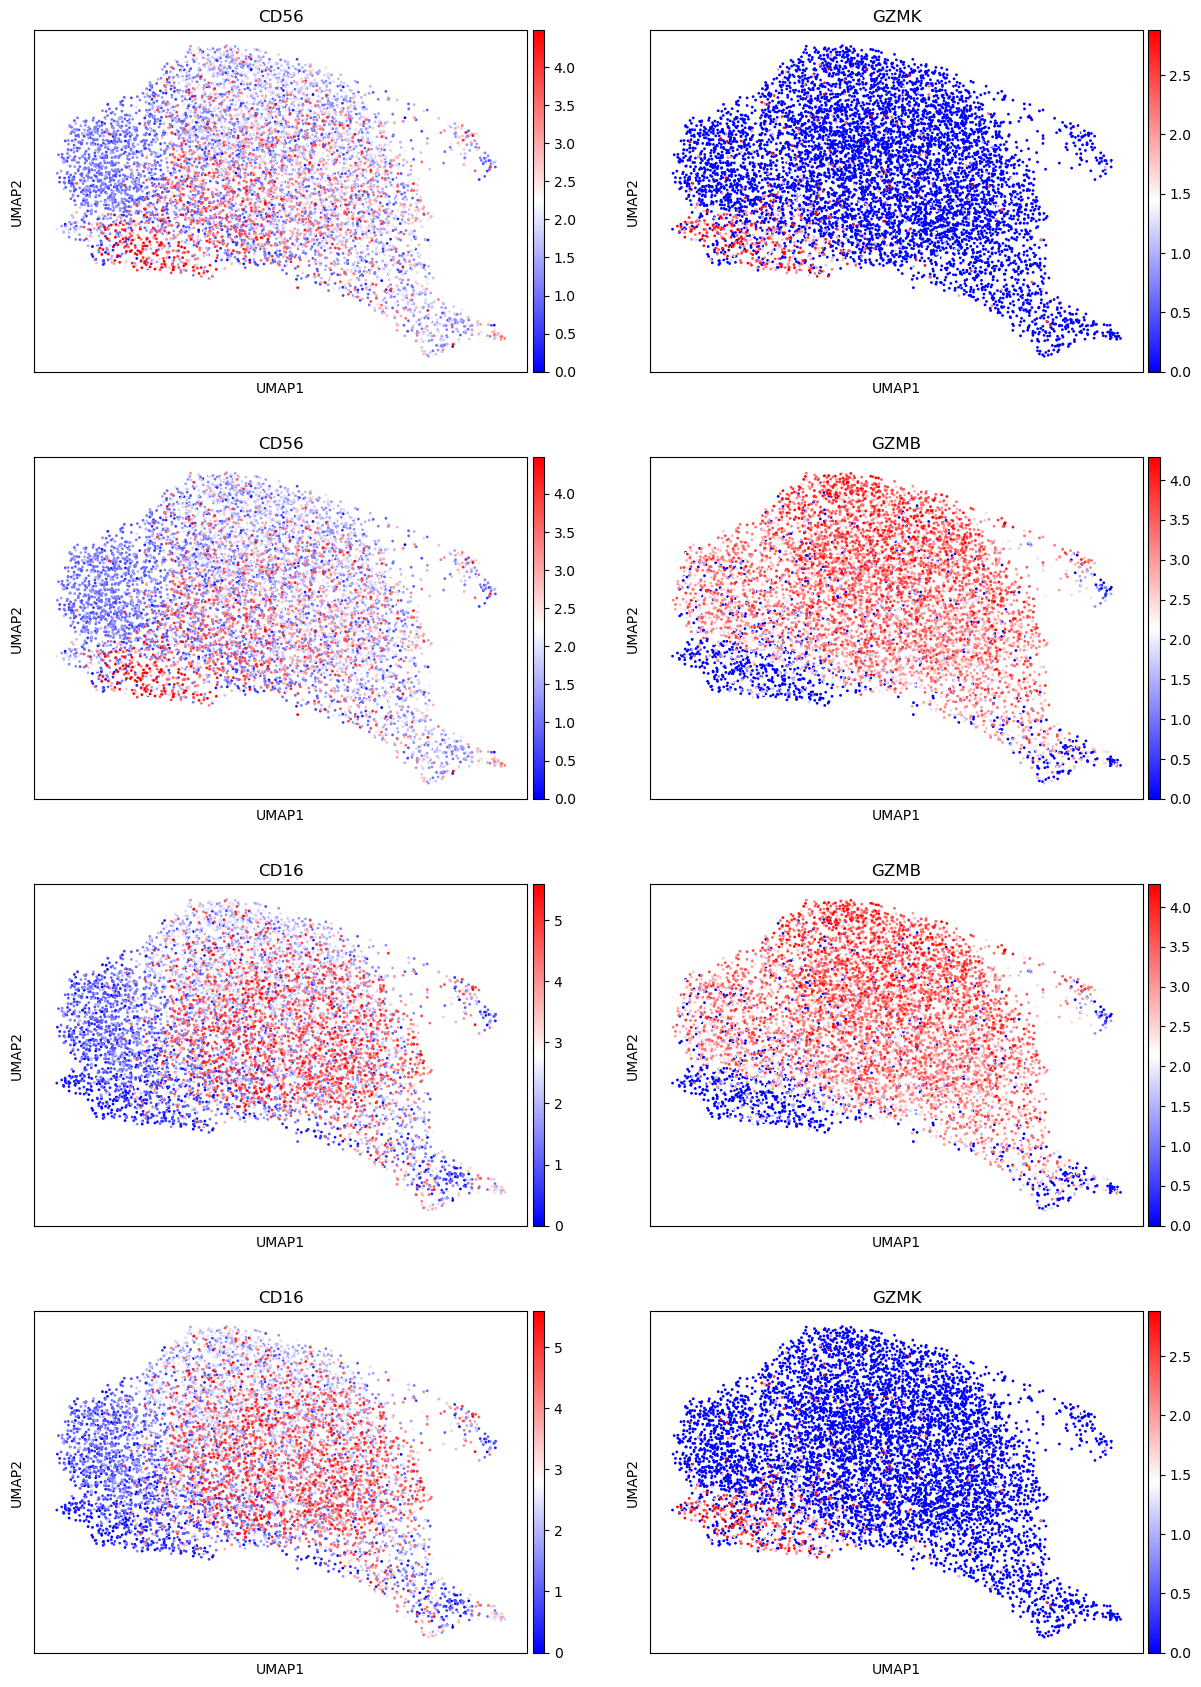

In [17]:
markers= ['CD56', 'GZMK', 'CD56', 'GZMB', 'CD16', 'GZMB', 'CD16', 'GZMK']

sc.pl.umap(neurips_nk, color = ['cell_type'], color_map = 'viridis')

#RNA
sc.pl.umap(neurips_nk, color = markers, vmax="p99", color_map = 'bwr', ncols=2)

# Protein vs protein/RNA scatterplots

In [18]:
X = neurips_nk.to_df()

X.shape

(7388, 21720)

In [19]:
prot_nk = neurips_nk.obsm['protein_expression_clr_neurips']

prot_nk.shape

(7388, 139)

In [20]:
#To exclude columns that contain only zeros

#prot_nk = pd.DataFrame(prot_nk)
prot_nk != 0
(prot_nk != 0).any(axis=0)
prot_nk.loc[:, (prot_nk != 0).any(axis=0)]
prot_nk = prot_nk.loc[:, (prot_nk != 0).any(axis=0)]

In [21]:
prot_nk.shape

(7388, 134)

In [22]:
df_comb = pd.concat([X,prot_nk], axis=1)

In [35]:
df_comb_cd16=df_comb.sort_values(by='CD16', ascending=True)

In [36]:
df_comb_cd16['CD16']

ACCTGTCTCACAGTGT-1-s1d3    0.000000
CACAGGCGTTTCTATC-1-s3d7    0.000000
TTGCTGCAGTTGGAAT-1-s3d7    0.000000
CGCATGGCAGGTCAAG-1-s3d7    0.000000
TGACGCGTCAAGAGGC-1-s3d7    0.000000
                             ...   
TCACTATTCAGACAAA-1-s4d8    6.126854
GTGAGGATCTGGAGAG-1-s4d8    6.163776
GTTAGACAGCAACAAT-1-s4d8    6.217732
AACAAAGAGAAACTGT-1-s4d8    6.232439
GGAGCAACAATCCTTT-1-s4d8    7.900404
Name: CD16, Length: 7388, dtype: float64

Text(0.5, 0, 'CD57')

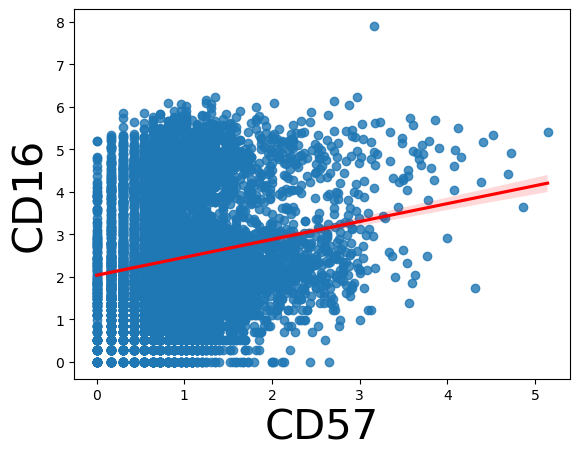

In [38]:
a = sns.regplot(data=df_comb_cd16, x='CD57' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("CD57",fontsize=30)

Text(0.5, 0, 'CD94')

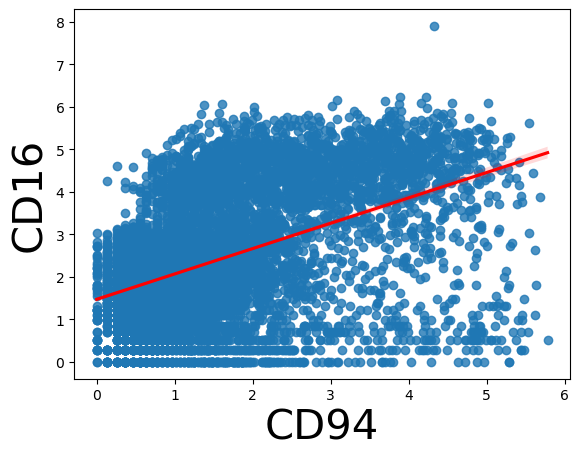

In [41]:
a = sns.regplot(data=df_comb_cd16, x='CD94' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("CD94",fontsize=30)

Text(0.5, 0, 'FCGR3A')

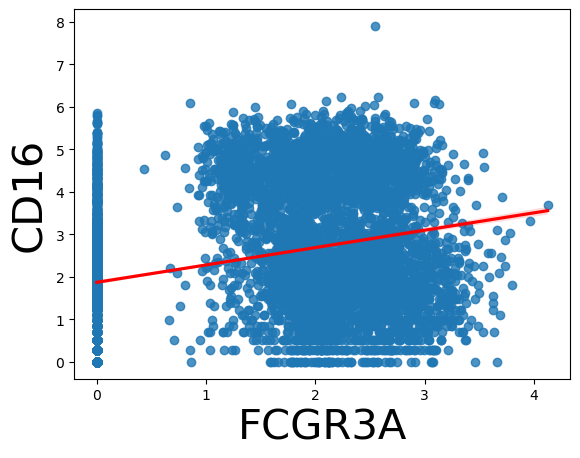

In [26]:
a = sns.regplot(data=df_comb_cd16, x='FCGR3A' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("FCGR3A",fontsize=30)

Text(0.5, 0, 'GZMK')

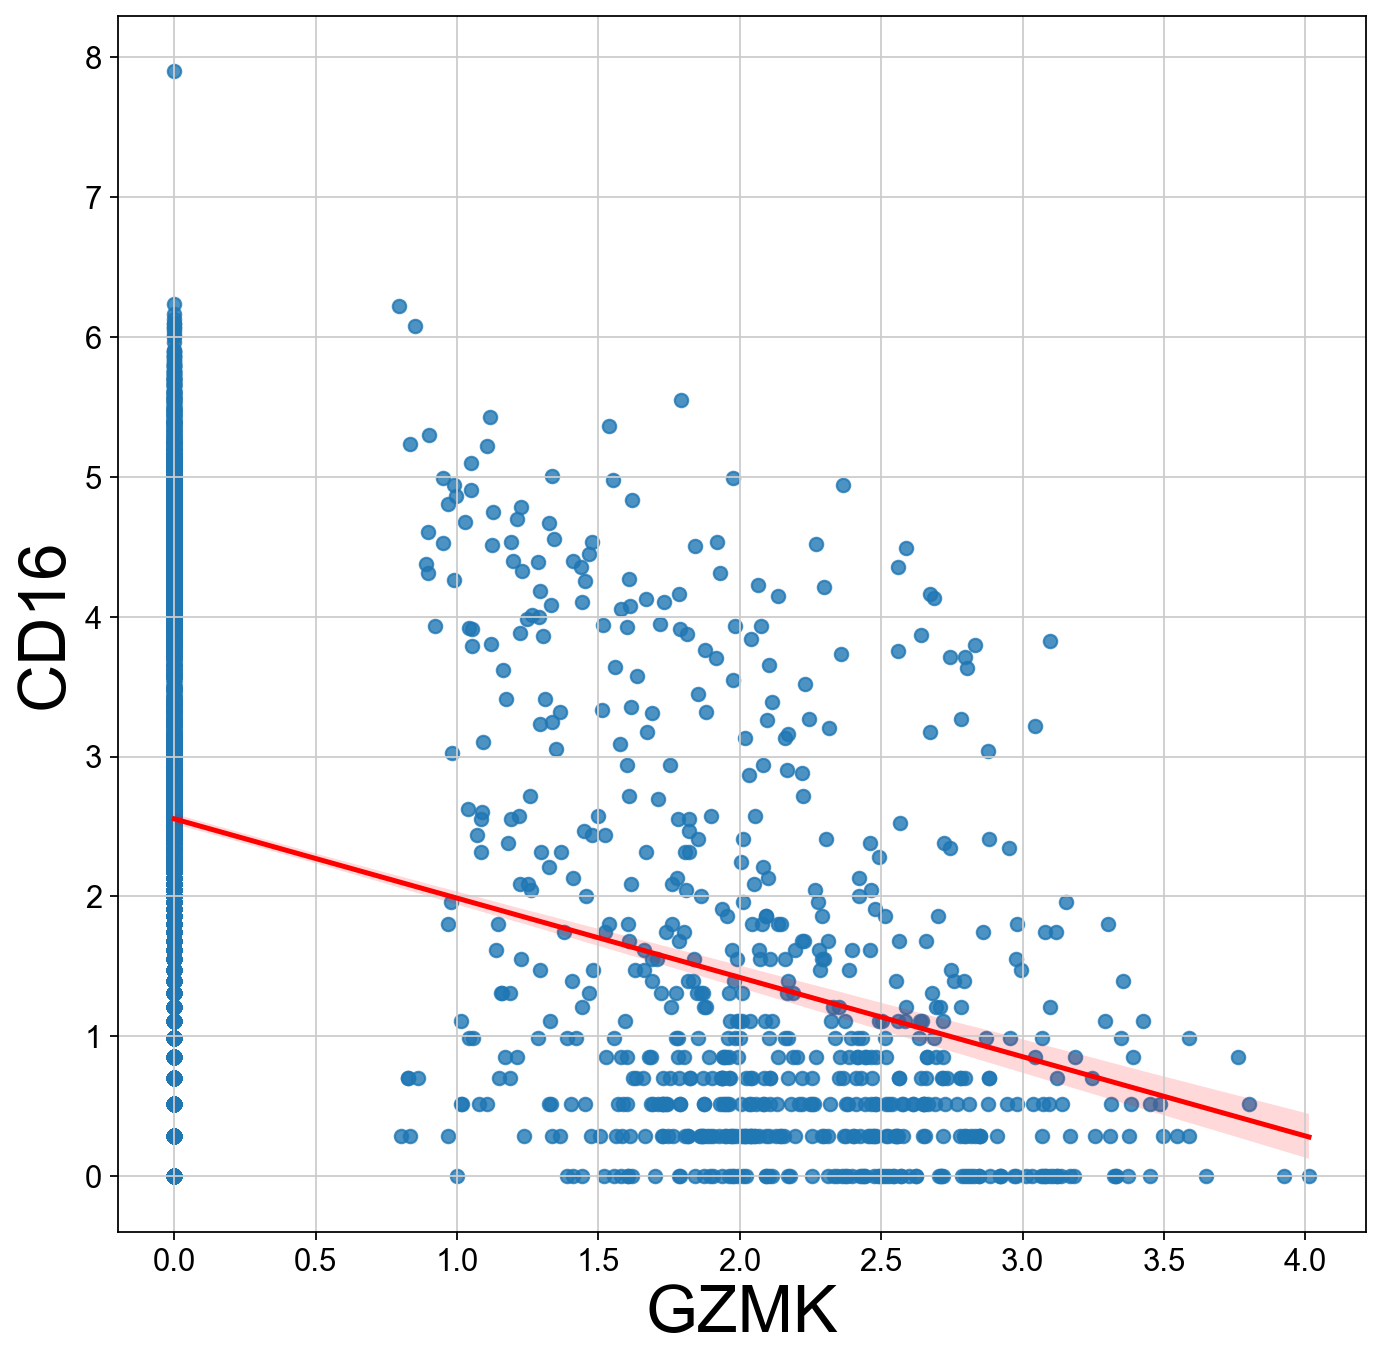

In [49]:
a = sns.regplot(data=df_comb_cd16, x='GZMK' , y='CD16', 
                line_kws = {"color": "red"})
a.set_ylabel("CD16",fontsize=30)
a.set_xlabel("GZMK",fontsize=30)

In [50]:
#df ordered by CD56

df_comb_cd56=df_comb.sort_values(by='CD56', ascending=True)

In [51]:
df_comb_cd56['CD56']

TCGCAGGTCCTACAAG-1-s2d1    0.000000
CTGTACCAGGGCAACT-1-s3d7    0.000000
CGGGTGTCATGGGCAA-1-s2d1    0.000000
GCCGATGAGTCCTGTA-1-s2d1    0.000000
GACCAATTCAGACTGT-1-s2d5    0.000000
                             ...   
CCGGACAGTCCTACAA-1-s1d2    5.434825
TGTGCGGTCTACACAG-1-s1d2    5.443877
TCGACCTAGCCTATCA-1-s1d3    5.510115
GTTGCGGCAGACACCC-1-s1d3    5.534277
CCGTAGGTCCCTCAAC-1-s1d3    6.191045
Name: CD56, Length: 7388, dtype: float64

Text(0.5, 0, 'GZMB')

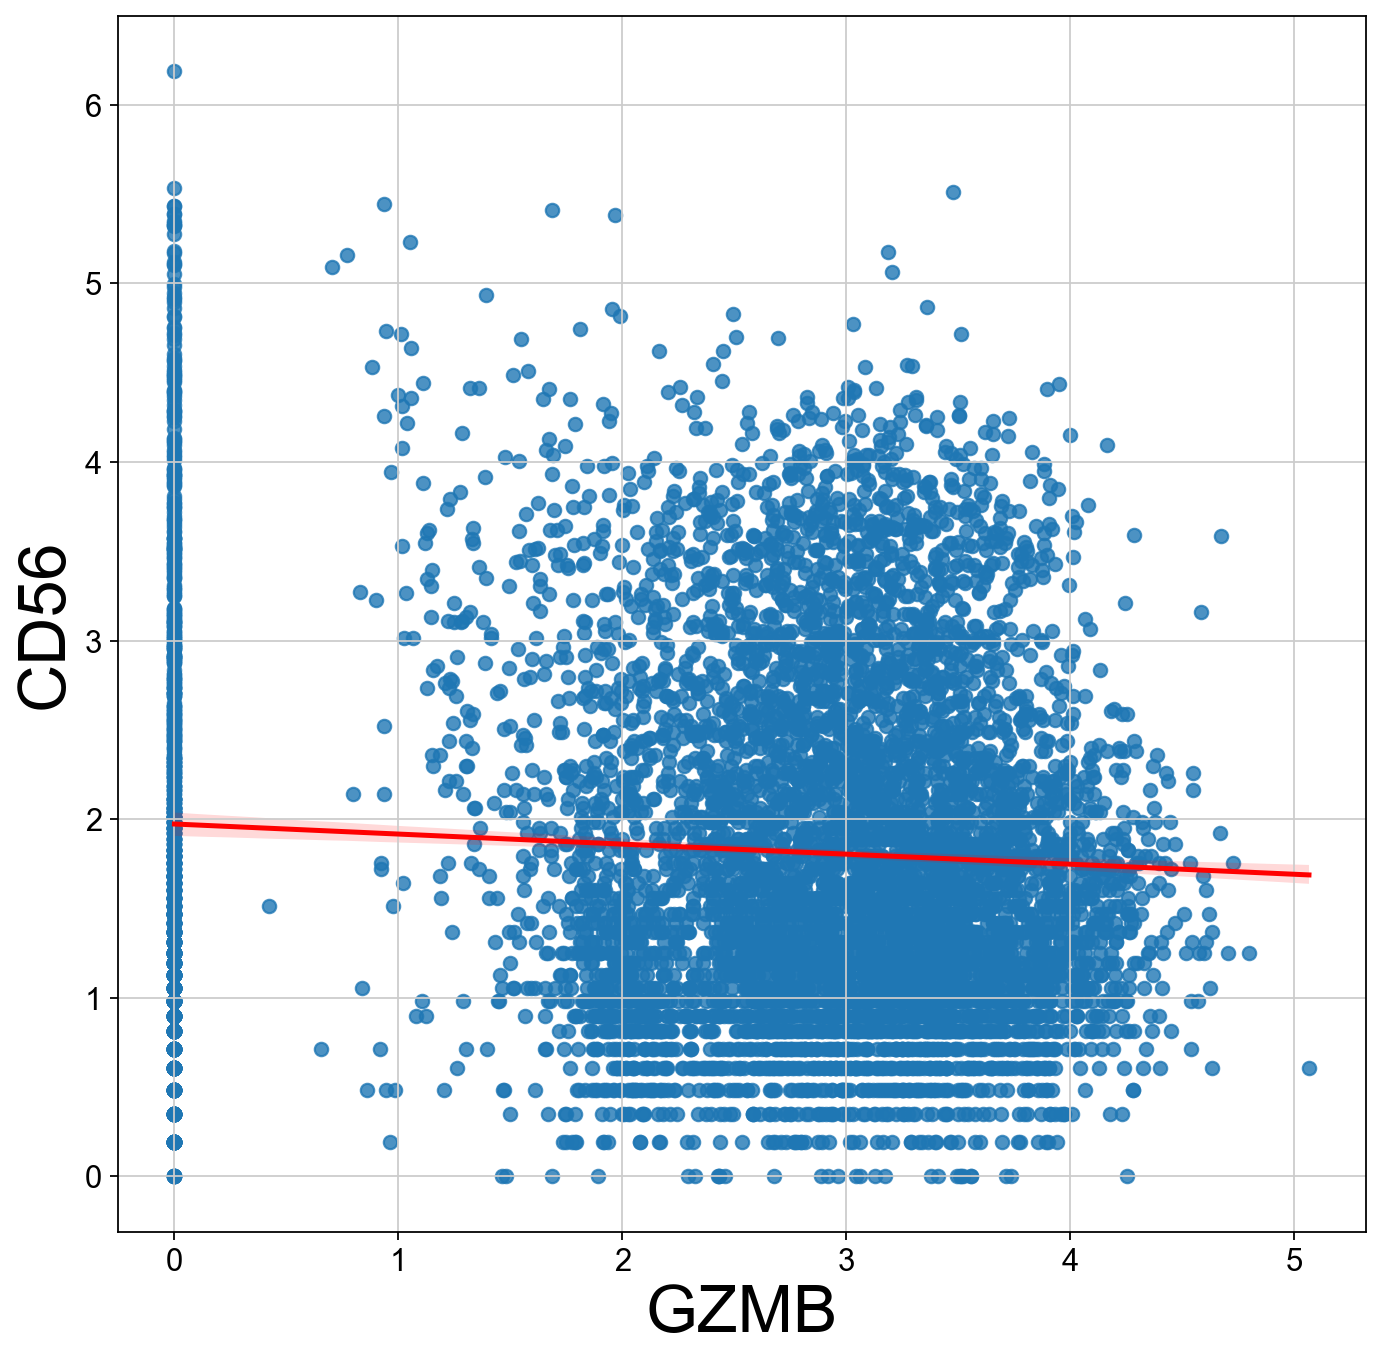

In [52]:
a = sns.regplot(data=df_comb_cd56, x='GZMB' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("GZMB",fontsize=30)

Text(0.5, 0, 'GZMK')

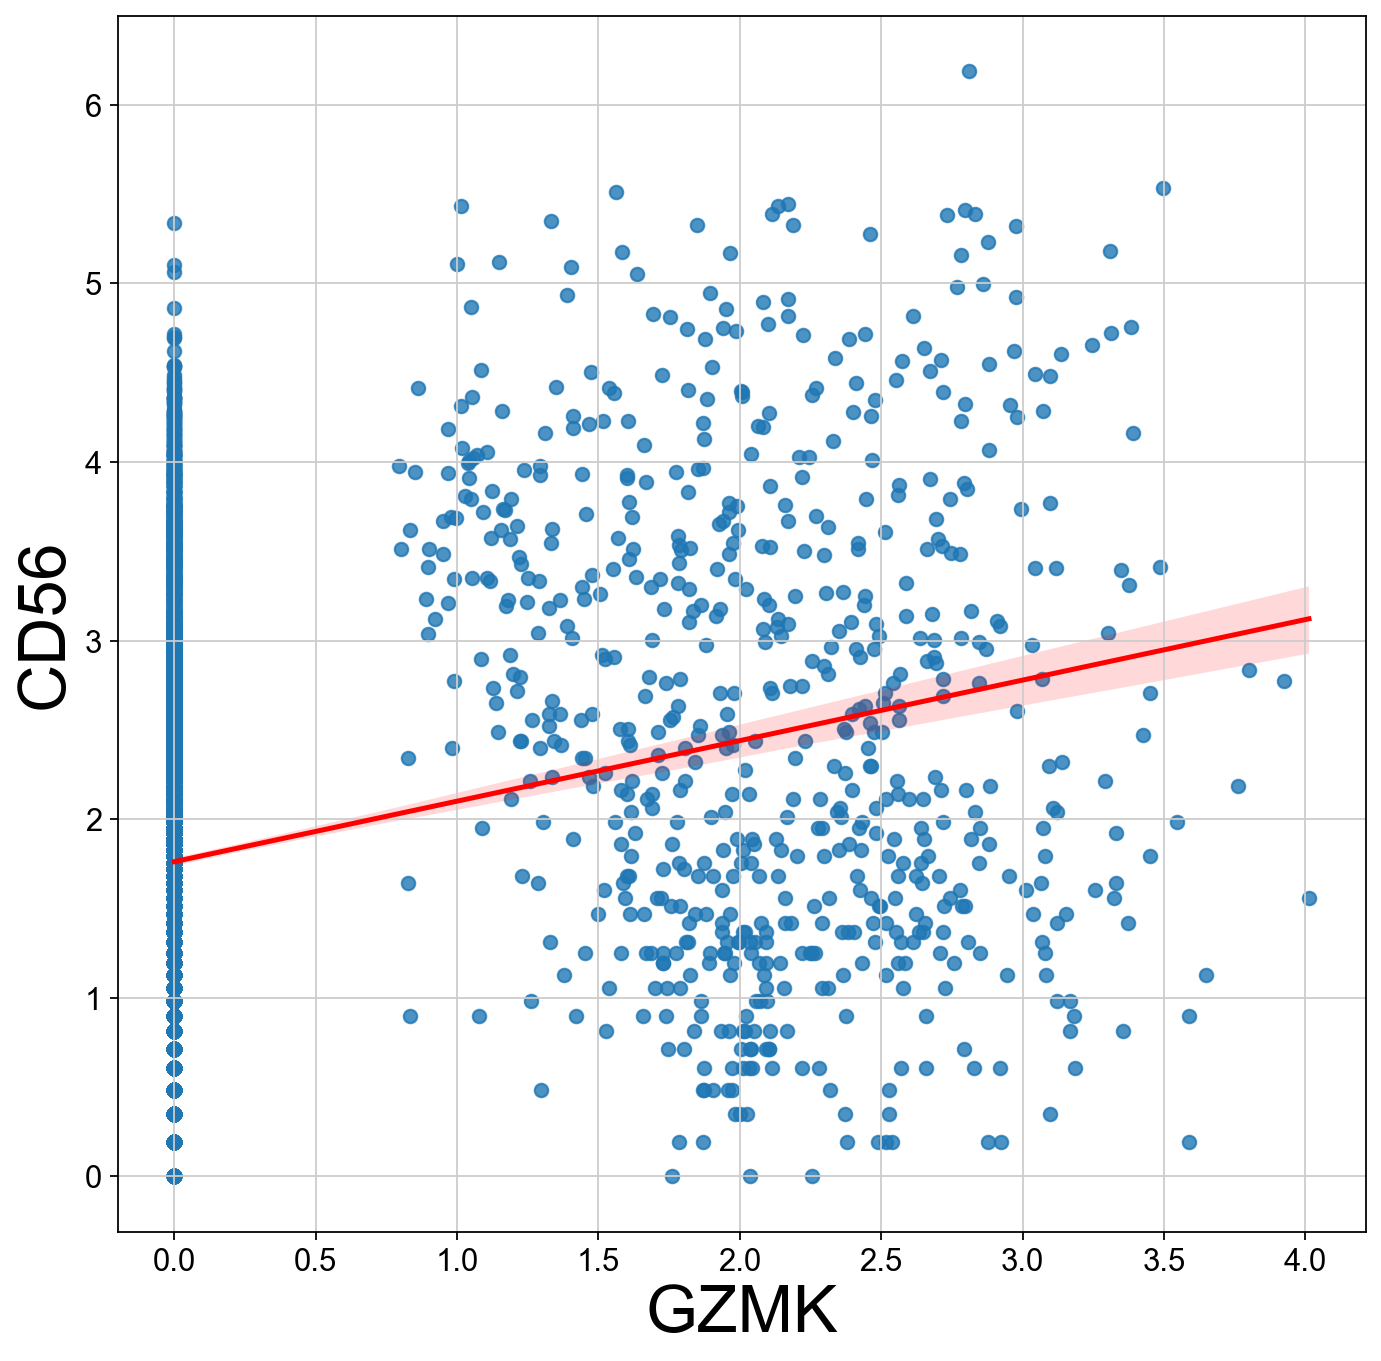

In [53]:
a = sns.regplot(data=df_comb_cd56, x='GZMK' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("GZMK",fontsize=30)

Text(0.5, 0, 'NCAM1')

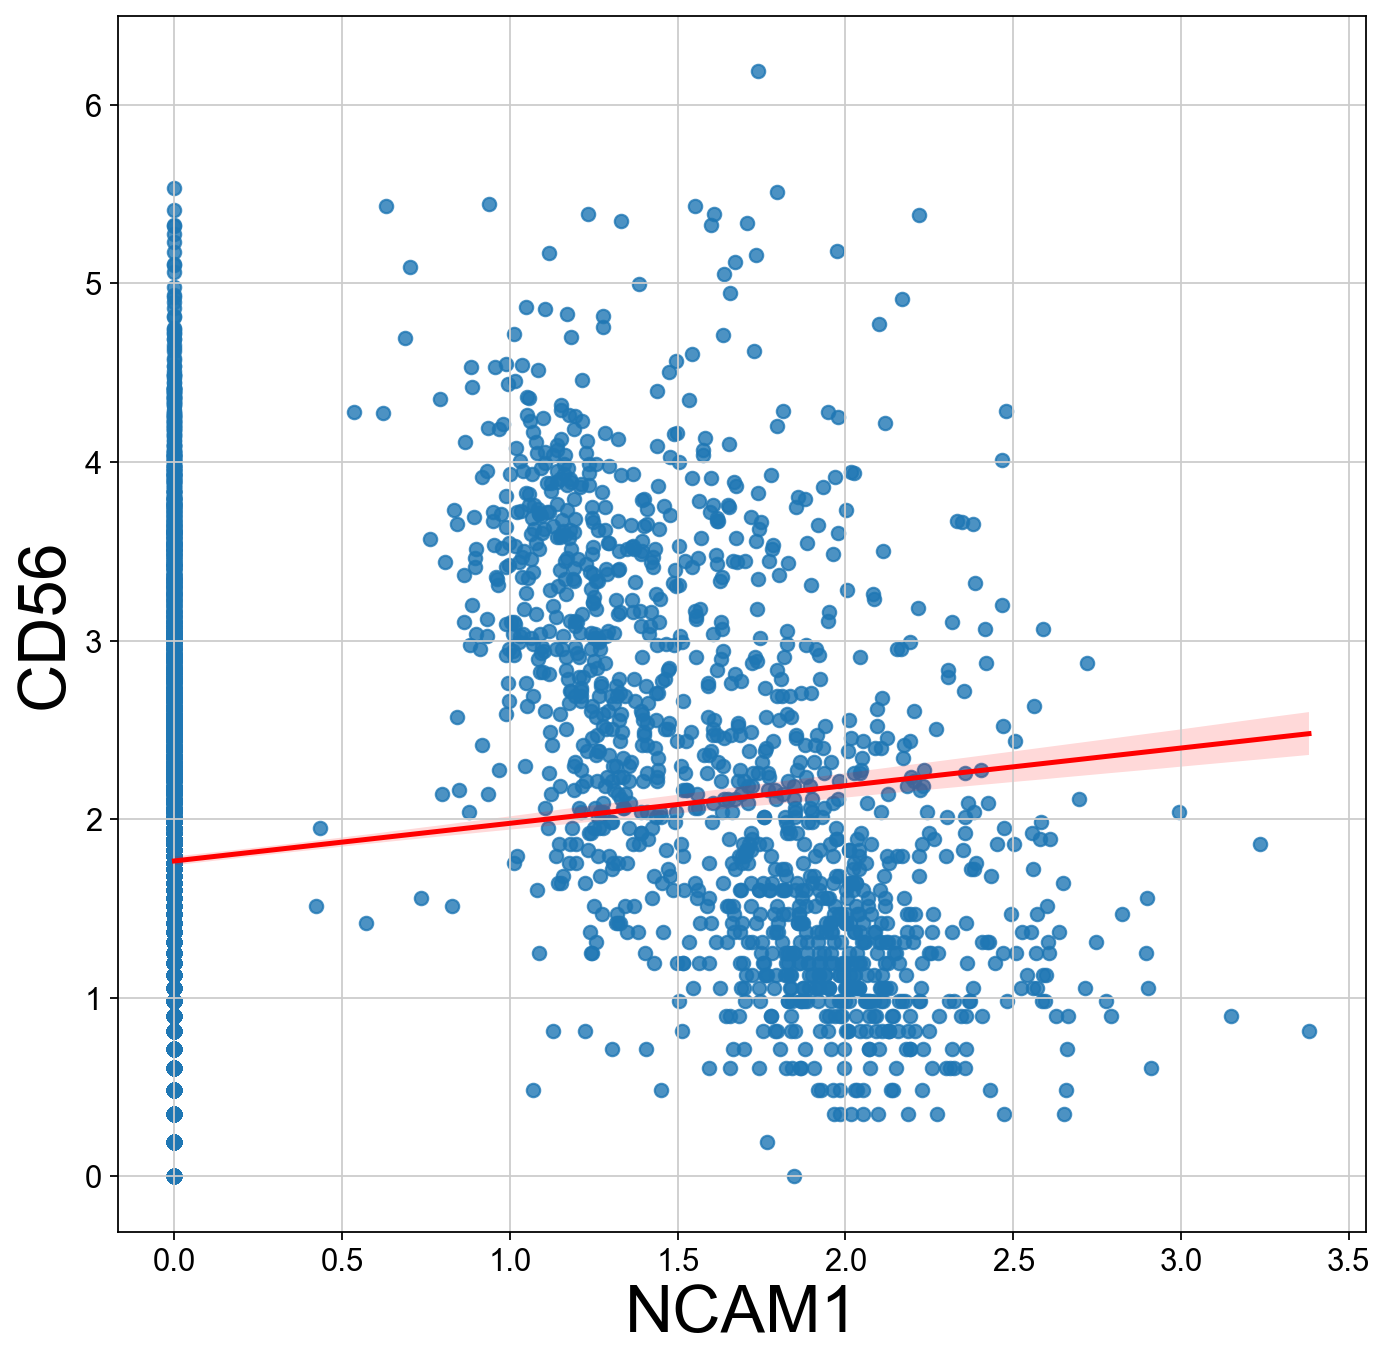

In [54]:
a = sns.regplot(data=df_comb_cd56, x='NCAM1' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("NCAM1",fontsize=30)

Text(0.5, 0, 'CD57')

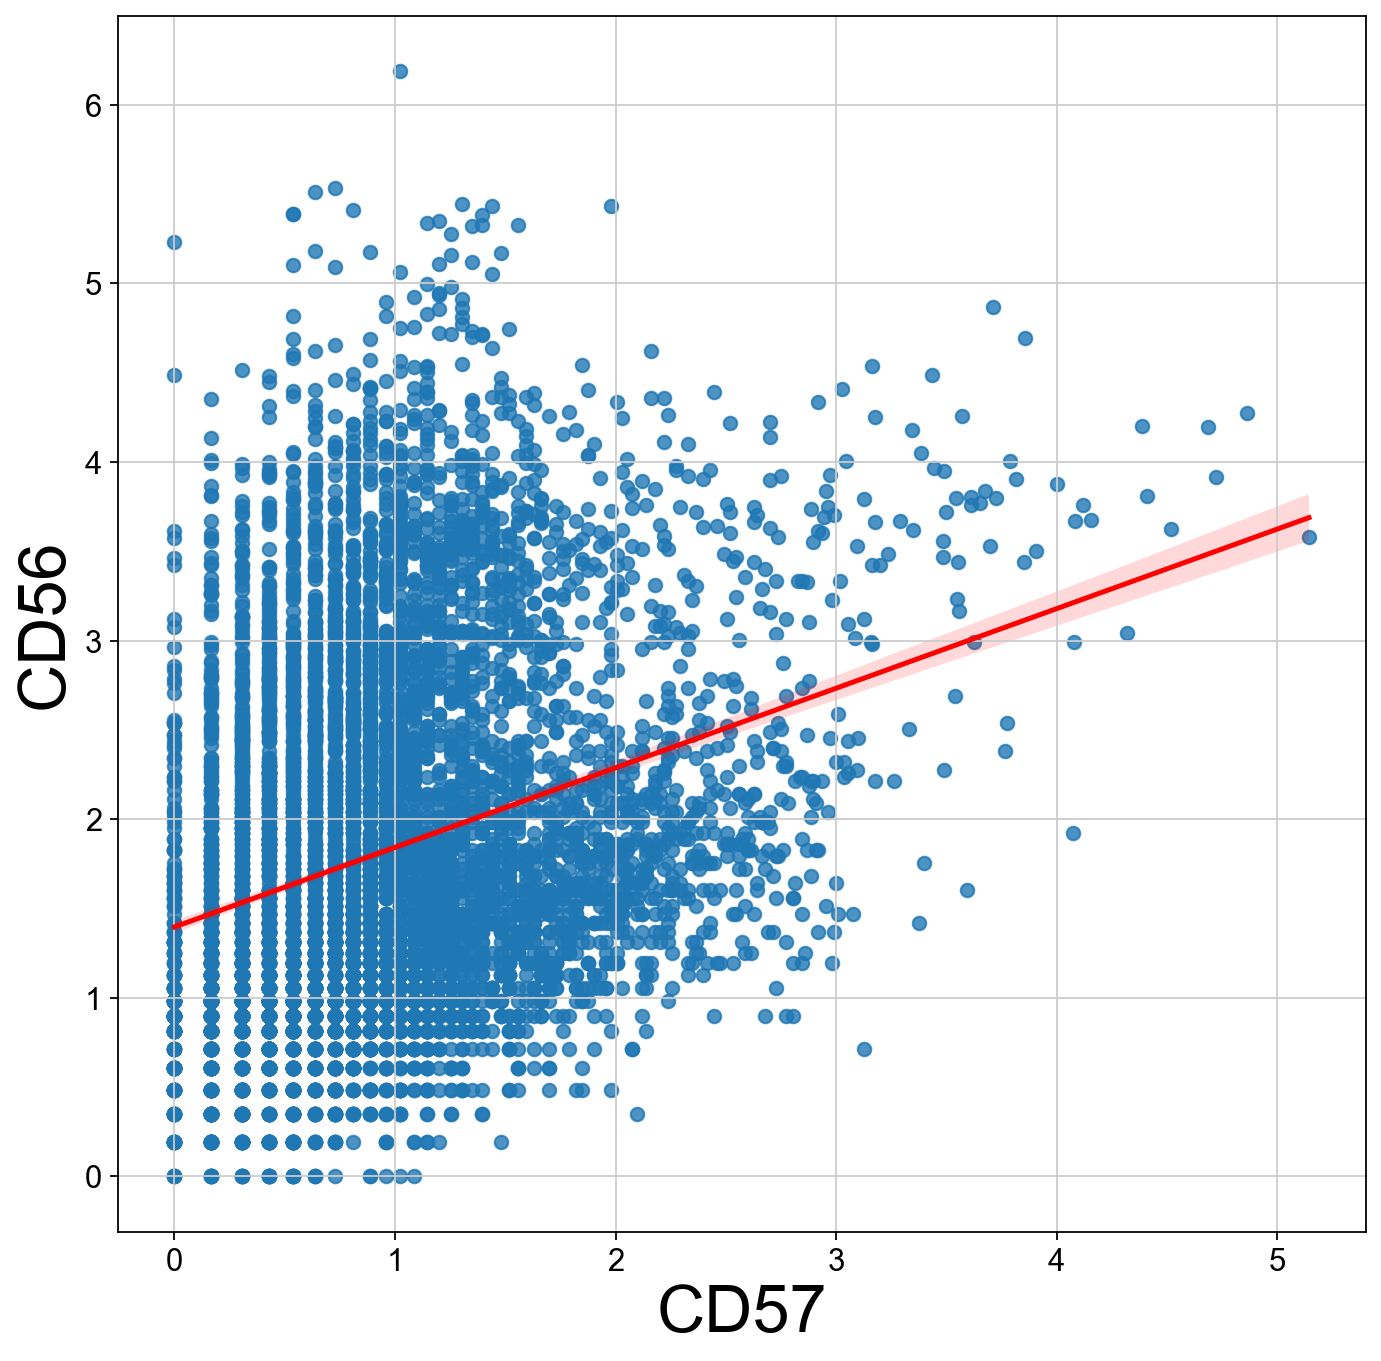

In [57]:
a = sns.regplot(data=df_comb_cd56, x='CD57' , y='CD56', 
                line_kws = {"color": "red"})
a.set_ylabel("CD56",fontsize=30)
a.set_xlabel("CD57",fontsize=30)